Activity 9: Extracting the Top 100 eBooks from Gutenberg

In [41]:
#Import the necesssary libraries
import urllib.request, urllib.parse, urllib.error
import requests
from bs4 import BeautifulSoup
import ssl
import re

In [3]:
#Check the SSl certificate
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

In [4]:
#Read the HTML from the URL
top100url = 'https://www.gutenberg.org/browse/scores/top'
response = requests.get(top100url)

In [5]:
#Write a small function to check the web request
def status_check(r):
    if r.status_code==200:
        print("Success!")
        return 1
    else:
        print("Failed!")
        return -1

In [6]:
status_check(response)

Success!


1

In [7]:
#Decode the response and pass this on to BeautifulSoup
contents = response.content.decode(response.encoding)

In [8]:
soup = BeautifulSoup(contents, 'html.parser')

In [9]:
#Find all the href tags and store them
lst_links=[]

In [10]:
for link in soup.find_all('a'):
    #print(link.get('href'))
    lst_links.append(link.get('href'))

In [11]:
lst_links[:30]

['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 '#books-last1',
 '#authors-last1',
 '#books-last7']

In [12]:
#Use a regular expression to find the numeric digits in these links
booknum=[]

In [13]:
for i in range(19,119):
    link=lst_links[i]
    link=link.strip()
    # Regular expression to find the numeric digits in the link (href) string
    n=re.findall('[0-9]+',link)
    if len(n)==1:
        # Append the filenumber casted as integer
        booknum.append(int(n[0]))

In [14]:
#Print the file numbers
print ("\nThe file numbers for the top 100 ebooks on Gutenberg are shown below\n"+"-"*70)
print(booknum)


The file numbers for the top 100 ebooks on Gutenberg are shown below
----------------------------------------------------------------------
[1, 1, 7, 7, 30, 30, 17607, 1513, 2641, 145, 37106, 2701, 16389, 100, 67979, 6761, 394, 2160, 4085, 6593, 5197, 1259, 84, 1342, 11, 64317, 1952, 174, 2542, 98, 68891, 1080, 70049, 844, 408, 1661, 345, 70048, 1400, 25344, 5200, 29720, 28054, 1260, 70047, 70051, 4300, 76, 1232, 2591, 219, 2554, 70055, 205, 43, 42108, 1184, 6130, 20228, 46, 5827, 36, 2600, 23, 779, 15399, 70050, 996, 2814, 3207, 1727, 45, 3206, 514, 16328, 74, 1497, 67098, 768, 58585, 120, 55, 10676, 5740, 70045, 244, 30254, 203, 16, 158, 1250, 47629]


In [15]:
#What does the soup object's text look like?
print(soup.text[:2000])





Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright Procedures
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Donation







Frequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.

Downloaded Books
2023-02-16279663
last 7 days1856361
last 30 days8092695



Top 100 EBooks yesterd

In [16]:
#Search the extracted text
lst_titles_temp=[]

In [17]:
#Create a starting index
start_idx=soup.text.splitlines().index('Top 100 EBooks yesterday')

In [19]:
#Loop 1-100
for i in range(100):
    lst_titles_temp.append(soup.text.splitlines()[start_idx+2+i])

In [20]:
#Use a regular expression to extract only text
lst_titles=[]
for i in range(100):
    id1,id2=re.match('^[a-zA-Z ]*',lst_titles_temp[i]).span()
    lst_titles.append(lst_titles_temp[i][id1:id2])

In [21]:
#Print the list of titles
for l in lst_titles:
    print(l)

Top 
Top 
Top 
Top 


Top 

Superstition In All Ages 
Romeo and Juliet by William Shakespeare 
A Room with a View by E
Middlemarch by George Eliot 
Little Women
Moby Dick
The Enchanted April by Elizabeth Von Arnim 
The Complete Works of William Shakespeare by William Shakespeare 
The Blue Castle
The Adventures of Ferdinand Count Fathom 
Cranford by Elizabeth Cleghorn Gaskell 
The Expedition of Humphry Clinker by T
The Adventures of Roderick Random by T
History of Tom Jones
My Life 
Twenty Years After by Alexandre Dumas 
Frankenstein
Pride and Prejudice by Jane Austen 
Alice
The Great Gatsby by F
The Yellow Wallpaper by Charlotte Perkins Gilman 
The Picture of Dorian Gray by Oscar Wilde 
A Doll
A Tale of Two Cities by Charles Dickens 
The alley cat
A Modest Proposal by Jonathan Swift 
Egyptian decorative art 
The Importance of Being Earnest
The Souls of Black Folk by W
The Adventures of Sherlock Holmes by Arthur Conan Doyle 
Dracula by Bram Stoker 
The great Skene mystery by Bernard Cap

Activity 10: Building your own movie database by reading an API

In [43]:
import json

In [45]:
#Open the APIkeys.json file
with open('APIkeys.json') as f:
    keys = json.load(f)
    omdbapi = keys['OMDBapi']

In [46]:
#Assign the OMDB portal as a string 
serviceurl = 'http://www.omdbapi.com/?'

In [47]:
#Create a variable called apikey
apikey = '&apikey='+omdbapi

In [48]:
#Write a utility function called print_json to print the movie data from a JSON file
def print_json(json_data):
    list_keys=['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 
               'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Ratings', 
               'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']
    print("-"*50)
    for k in list_keys:
        if k in list(json_data.keys()):
            print(f"{k}: {json_data[k]}")
    print("-"*50)

In [49]:
#Write a utility function to download a poster of the movie
def save_poster(json_data):
    import os
    title = json_data['Title']
    poster_url = json_data['Poster']
    poster_file_extension=poster_url.split('.')[-1]
    poster_data = urllib.request.urlopen(poster_url).read()
        
    savelocation=os.getcwd()+'\\'+'Posters'+'\\'
    if not os.path.isdir(savelocation):
        os.mkdir(savelocation)
    
    filename=savelocation+str(title)+'.'+poster_file_extension
    f=open(filename,'wb')
    f.write(poster_data)
    f.close()

In [50]:
#Write a utility function called search_movie to search a movie by its name
def search_movie(title):
    try:
        url = serviceurl + urllib.parse.urlencode({'t': str(title)})+apikey
        print(f'Retrieving the data of "{title}" now... ')
        print(url)
        uh = urllib.request.urlopen(url)
        data = uh.read()
        json_data=json.loads(data)
        
        if json_data['Response']=='True':
            print_json(json_data)
            # Asks user whether to download the poster of the movie
            if json_data['Poster']!='N/A':
                save_poster(json_data)
        else:
            print("Error encountered: ",json_data['Error'])
    
    except urllib.error.URLError as e:
        print(f"ERROR: {e.reason}")

In [51]:
#Test the search_movie function by entering Titanic
search_movie("Titanic")

Retrieving the data of "Titanic" now... 
http://www.omdbapi.com/?t=Titanic&apikey=81231736
--------------------------------------------------
Title: Titanic
Year: 1997
Rated: PG-13
Released: 19 Dec 1997
Runtime: 194 min
Genre: Drama, Romance
Director: James Cameron
Writer: James Cameron
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language: English, Swedish, Italian, French
Country: United States, Mexico
Awards: Won 11 Oscars. 126 wins & 83 nominations total
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.9/10'}, {'Source': 'Rotten Tomatoes', 'Value': '88%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore: 75
imdbRating: 7.9
imdbVotes: 1,185,567
imdbID: tt0120338
--------------------------------------------------


In [52]:
#Test the search_movie function by entering Random_error
search_movie("Random_error")

Retrieving the data of "Random_error" now... 
http://www.omdbapi.com/?t=Random_error&apikey=81231736
Error encountered:  Movie not found!


3. Connect to the Twitter API and do a simple data pull (Using OpenWeather instead)

In [21]:
import requests

In [27]:
api_key = "c863d1ca7edb35ee7f055c815ed452d2"

In [23]:
base_url = "https://api.openweathermap.org/data/2.5/weather?"

In [30]:
zip_Code = '68123'

In [31]:
Url = base_url + "zip=" + zip_Code + ",us&appid=" + api_key

In [32]:
response = requests.get(Url)

In [36]:
response2 = response.json()

In [37]:
response2

{'coord': {'lon': -95.9393, 'lat': 41.1156},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 280.83,
  'feels_like': 278.82,
  'temp_min': 279.15,
  'temp_max': 282.29,
  'pressure': 1012,
  'humidity': 59},
 'visibility': 10000,
 'wind': {'speed': 3.09, 'deg': 350},
 'clouds': {'all': 0},
 'dt': 1676837020,
 'sys': {'type': 2,
  'id': 2022710,
  'country': 'US',
  'sunrise': 1676812401,
  'sunset': 1676851331},
 'timezone': -21600,
 'id': 0,
 'name': 'Bellevue',
 'cod': 200}

4. Using one of the datasets provided in Weeks 7 & 8, or a dataset of your own, choose 3 of the following visualizations to complete.

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
data = pd.read_csv('Play by Play data.2022.csv')

In [7]:
data

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,...,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards
0,2022090800,9/8/2022,2,2,0,NaN,NaN,0,0,100,...,0,0,NaN,0,OPP,0,NaN,0,NaN,0
1,2022090800,9/8/2022,4,0,51,NaN,NaN,0,0,100,...,0,0,NaN,0,OPP,0,NaN,0,NaN,0
2,2022091102,9/11/2022,2,10,17,SF,CHI,2,6,94,...,0,0,RIGHT END,6,OPP,0,NaN,0,NaN,0
3,2022091102,9/11/2022,2,4,42,NaN,NaN,0,0,100,...,0,0,NaN,0,OPP,0,NaN,0,NaN,0
4,2022091102,9/11/2022,2,2,17,CHI,SF,1,10,53,...,0,0,RIGHT TACKLE,47,OPP,0,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38593,2022091101,9/11/2022,1,6,45,CLE,CAR,1,10,35,...,0,0,RIGHT TACKLE,35,OWN,1,CLE,1,OFFENSIVE HOLDING,10
38594,2022091101,9/11/2022,1,6,52,CAR,CLE,4,14,32,...,0,0,NaN,32,OWN,0,NaN,0,NaN,0
38595,2022091101,9/11/2022,1,9,17,CAR,CLE,1,10,36,...,0,0,CENTER,36,OWN,0,NaN,0,NaN,0
38596,2022090800,9/8/2022,3,0,33,BUF,LA,2,10,44,...,0,0,CENTER,44,OWN,0,NaN,0,NaN,0


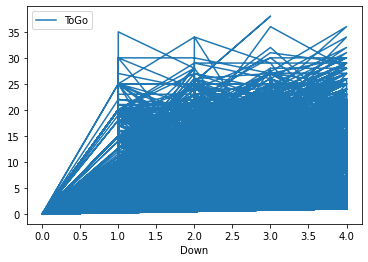

In [8]:
#Line plot
line = data.plot.line(x='Down', y='ToGo')

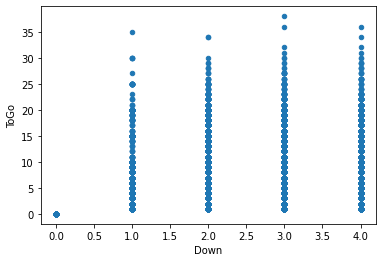

In [9]:
#Scatter plot
scatter = data.plot.scatter(x='Down', y='ToGo')

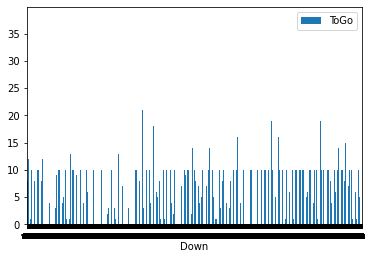

In [40]:
#Bar plot
bar = data.plot.bar(x='Down', y='ToGo')